In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters  #Register pandas formatters and converters with matplotlib.
from pylab import rcParams      # for customizing matplotlib graphs.
sns.set_style("whitegrid")      # This one is very important to keep overall plot background as white.

## Meta Data of this dataset
1. `Age` : Age of the patient(1-male, 0-female) 
2. `Sex` : Sex of the patient  
3. `exang`: exercise induced angina (1 = yes; 0 = no)  
4. `ca`: number of major vessels (0-3)  
5. `cp` : Chest Pain type chest pain type  
        Value 1: typical angina   
        Value 2: atypical angina  
        Value 3: non-anginal pain  
        Value 4: asymptomatic  
6. `trtbps` : resting blood pressure (in mm Hg)  
7. `chol` : cholestoral in mg/dl fetched via BMI sensor  
8. `fbs` : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
9. `rest_ecg` : resting electrocardiographic results  
        Value 0: normal  
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
10. `thalach` : maximum heart rate achieved  
11. `target` : 0= less chance of heart attack 1= more chance of heart attack  

In [22]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


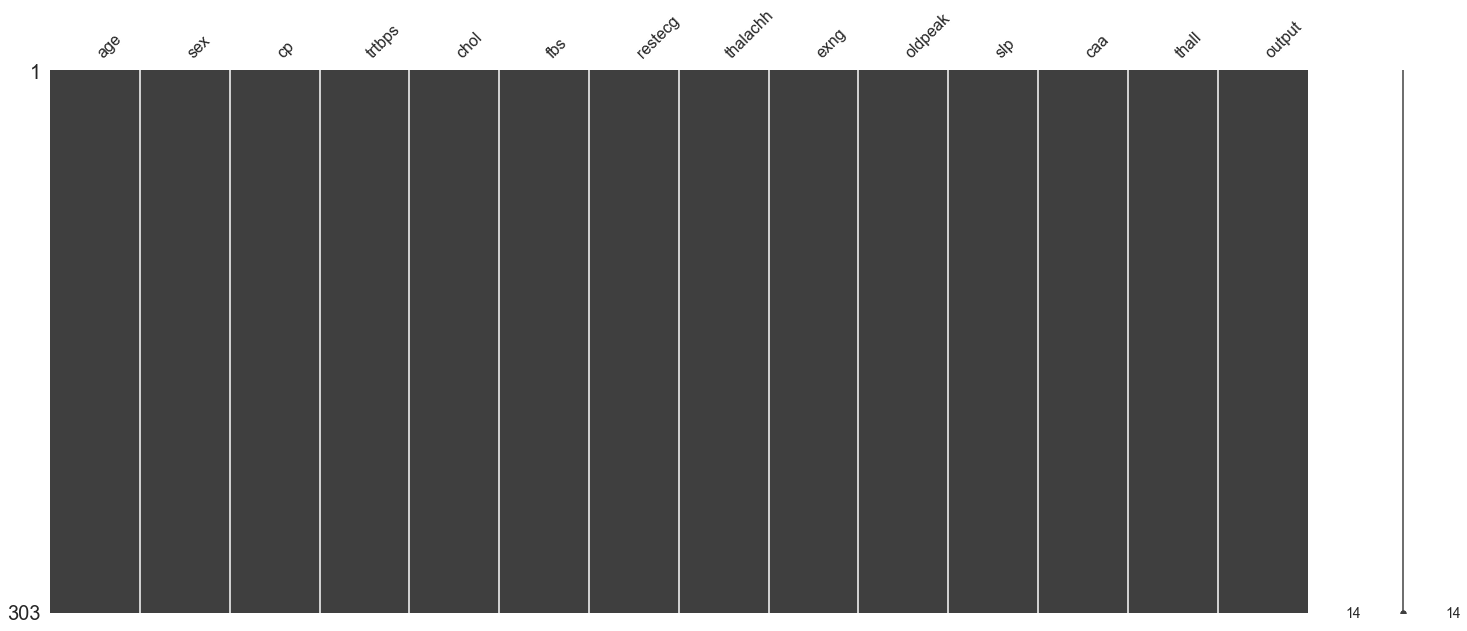

In [32]:
# finding missing values in the dataset
import missingno as msng 
msng.matrix(df)
df.info()

`No missing values in the data set`

In [10]:
# finding unique values in each column.
col_names = df.columns
for col in col_names:
    uv_values = df[col].nunique()
    print(f"{col}:{uv_values}")

age:41
sex:2
cp:4
trtbps:49
chol:152
fbs:2
restecg:3
thalachh:91
exng:2
oldpeak:40
slp:3
caa:5
thall:4
output:2


In [29]:
df['trtbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trtbps, dtype: float64

<AxesSubplot:xlabel='output', ylabel='count'>

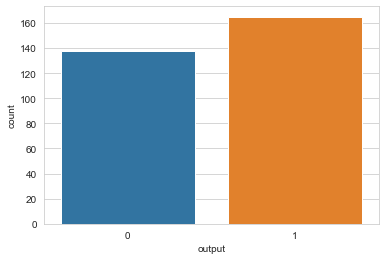

In [11]:
#distrubution of Output data column
sns.countplot(x= df.output)

`Data points with 1-more chance to heart attack are higher`

<AxesSubplot:xlabel='sex', ylabel='count'>

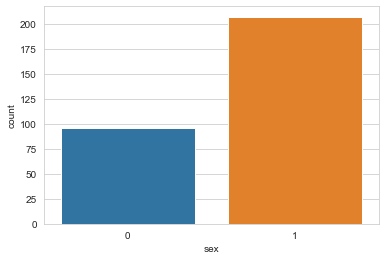

In [13]:
sns.countplot(x= df['sex'])

`There was large bias in the data points of 0 & 1`

<AxesSubplot:xlabel='age'>

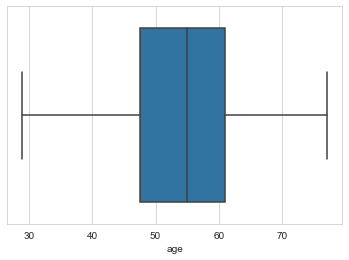

In [14]:
sns.boxplot(x= df.age)

`data contains people of age rangining from 47 to 62.`  
I think people in this age group are mostly subjected to heart attacks.

C:\Users\rnr31\anaconda3\envs\ds22\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

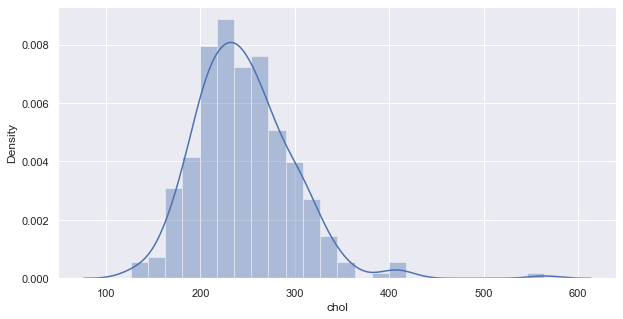

In [21]:
# Now work on numerical columns, i.e., columns which has more than 4 unique value
# cholestrol
sns.distplot(df.chol)

`chol column is of gaussian distrubution, then we can use standard scaler.`

C:\Users\rnr31\anaconda3\envs\ds22\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

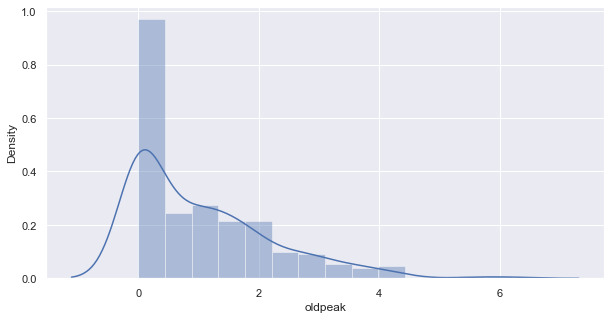

In [30]:
sns.distplot(df.oldpeak)

C:\Users\rnr31\anaconda3\envs\ds22\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='thalachh', ylabel='Density'>

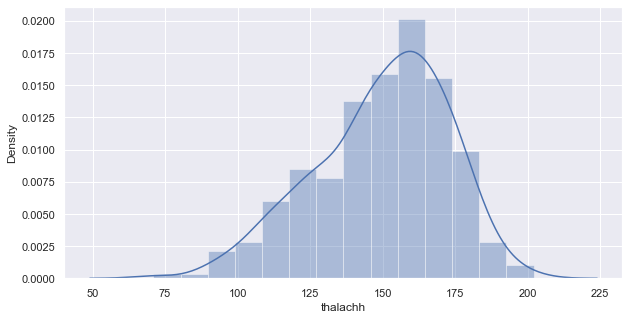

In [31]:
sns.distplot(df.thalachh)

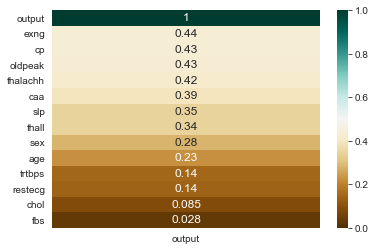

In [17]:
## Feature correlation
sns.heatmap(df.corr().loc[:,['output']].abs().sort_values(by=['output'], ascending=False), vmin=0, vmax=1, annot=True, cmap='BrBG', annot_kws={'size':12})
sns.set(rc={'figure.figsize':(10,7)});

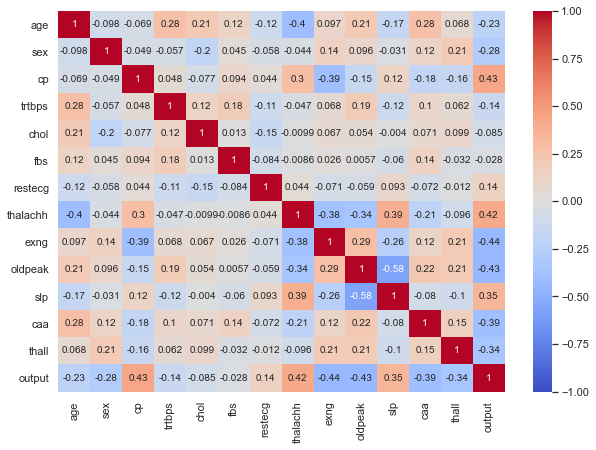

In [18]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', annot_kws={'size':10})
sns.set(rc={'figure.figsize':(10,5)});

<AxesSubplot:>

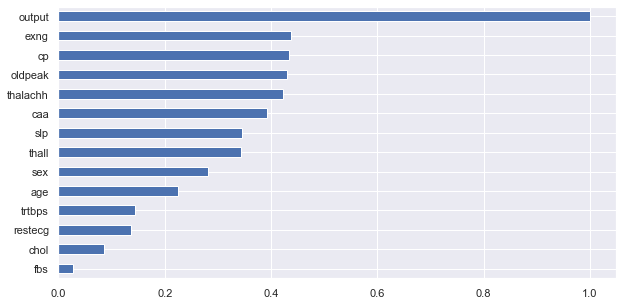

In [20]:
# for plotting features correlation using barchart
df.corr()['output'].abs().sort_values().plot(kind = 'barh')